In [ ]:
from datasets import load_from_disk
from IPython.display import display
from pathlib import Path
from PIL import Image
from io import BytesIO

In [2]:
dastaset_output_dir = Path("../../data") / "dataset" / "output"

dataset = load_from_disk(dastaset_output_dir)

dataset_df = dataset.to_pandas()


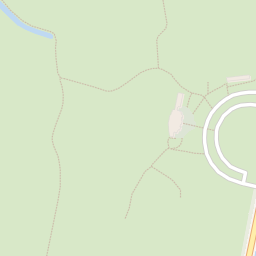
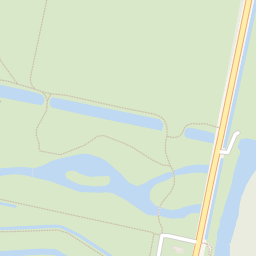
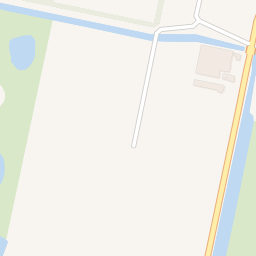
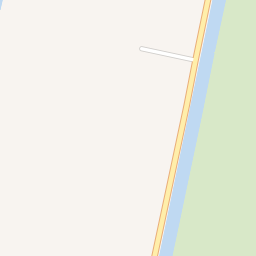
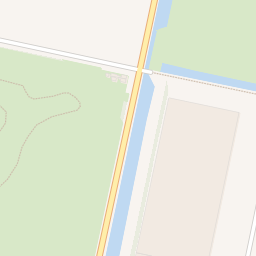

In [3]:
from PIL import Image
from io import BytesIO
from IPython.display import display, HTML
import base64

n = 5
html = "<div style='display: flex; flex-wrap: wrap;'>"

for idx, row in dataset_df.iterrows():
    image = Image.open(BytesIO(row["image"]["bytes"]))

    buffer = BytesIO()
    image.save(buffer, format="PNG")
    image_data = buffer.getvalue()
    image_base64 = base64.b64encode(image_data).decode("utf-8")

    # Generate HTML for image and caption
    html += f"""
    <div style='margin: 10px; text-align: center;'>
        <img src='data:image/png;base64,{image_base64}' style='width: 200px; height: auto;'/>
        <p>{row['caption']}</p>
    </div>
    """

html += "</div>"
display(HTML(html))